# TP 3 Regression linéaire
Dans ce TP, nous aimerions prédire l'admission d'un étudiant à une specialité donnée selon ses notes dans deux matières.

Pour ce faire, nous étudierons un ensemble de données avec l'admission  (y) et les notes des deux modules (X).

La prédiction se fera avec l'agorithme de descente du gradient.

# Importation des librairies necessaires au travail

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [ ]:
# données
data = np.genfromtxt('data.csv', delimiter=',', dtype=float)
data = data.astype(int)
data.shape

(100, 3)

Dans ces données (data), la première colonne represente la première note, la deuxieme colonne la deuxième note et la troisième colonne represente l'admission à la specialité (1 admis 0 non admis).

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

In [ ]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,0:2]))
y = data[:, 2];

In [ ]:
print('X', X.shape ,' y ', y.shape)

X (100, 3)  y  (100,)


# Descente du Gradient : Préparation des fonctions

0- Fonction logistique (Sigmoid)

In [ ]:
def sigmoid(z):
    # pour une valeur donnée, cette fonction calculera sa sigmoid
   return (1/(1+np.exp(-z))) 

1- Calcul du coût

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1)$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

In [ ]:
def computeCost(X, y, theta):
    # idéalement, tracer le coût à chaque itération pour s'assurer que la descente du gradient est correcte
    
    # calculer le coût avec et sans vectorisation, 
    # comparer le temps de traitement
    m = len(X)
    y = y.reshape(y.shape[0], 1)
    predictions = sigmoid(np.matmul(X, theta))
    return (sum((y)*np.log(predictions) + (1-y)*np.log(1-predictions))) / (-m)
  

2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

In [ ]:
def gradientDescent(X, y, theta, alphaa, iterations):
  costs = np.zeros(iterations)
  theta0 = np.zeros(iterations)
  theta1 = np.zeros(iterations)
  i = 0 
  derivative = 100
  seuil = 0.001 
  m= len(X)
  while((i<iterations) and (derivative>seuil)):
    costs[i] = computeCost(X, y, theta)
    predictions = sigmoid(np.matmul(X, theta))
    predictions = predictions.reshape((predictions.shape[0],))
    #print(f"\n Iteration {i} : theta = {theta}")
    theta0[i] = theta[0]
    theta1[i] = theta[1]
    diff = np.subtract(predictions, y)
    derivative = np.matmul(np.transpose(X), diff).reshape((theta.shape[0],1))
    i += 1
    theta = theta - (alpha/m) * derivative
    derivative = np.abs(derivative[0])
  return  (theta, costs, theta0, theta1)

# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

In [ ]:
n=X.shape[1]
theta = np.zeros((n, 1))
theta

array([[0.],
       [0.],
       [0.]])

Calculer le cout initial

In [ ]:
initialCost=computeCost(X, y, theta)
initialCost

array([0.69314718])

Appel des la fonction de calcul du gradient

In [ ]:
# paramètres avec nombre d'iteration = 1500
iterations = 1500;
alpha = 0.01;
# Appel
theta, costs, theta0, theta1 = gradientDescent(X, y, theta, alpha, iterations);

Traçage de la fonction du coût

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

# Dessin de la limite de decision (Descision Boundary)
Dans cette partie, nous aimerions dessiner la ligne separatrice d nos données

In [ ]:
def drawLine(X, theta):
    
  decision_boundary = -(theta[0] + theta[1] * X[:,1])/theta[2]
  plt.plot(X[:,1], decision_boundary)



  plt.scatter(X[np.where(y==1),1],X[np.where(y==1),2], label="accepte",marker ='o')
  plt.scatter(X[np.where(y==0),1],X[np.where(y==0),2], label="non accepte",marker ='x')

  plt.xlabel('Note module 1')
  plt.ylabel('Note module 2')

# Affichage 
Graphe representant les acceptations selon les caracteristiques

Text(0, 0.5, 'Note module 2')

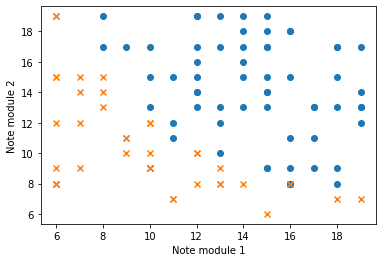

In [ ]:
  plt.scatter(X[np.where(y==1),1],X[np.where(y==1),2], label="accepte",marker ='o')
  plt.scatter(X[np.where(y==0),1],X[np.where(y==0),2], label="non accepte",marker ='x')

  plt.xlabel('Note module 1')
  plt.ylabel('Note module 2')

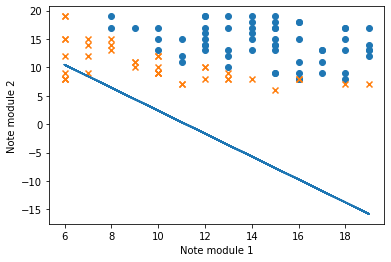

In [ ]:
drawLine(X,theta)

Nous remarquons que la ligne ne separe pas bien les données

Traçage du coût en fonction de theta0 et theta1

In [ ]:
def plot_cost_iterations(theta0, theta1, costs):
  fig, ax1 = plt.subplots()


  ax1.set_xlabel('Iterations')
  ax1.tick_params(axis='y')

  ax2 = ax1.twinx()
  ax2.plot(costs, label='J(theta)')
  ax1.tick_params(axis='y')

  fig.legend();


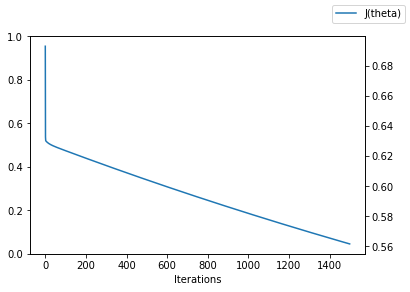

In [ ]:
plot_cost_iterations(theta0, theta1, costs)

In [ ]:
def plot_costs_theta(costs, thetha0, theta1):

  fig = plt.figure()
  ax = fig.gca(projection='3d')
  z = costs
  x = theta0
  y = theta1
  ax.plot(x, y, z, label='J (theta)')
  ax.legend()

plt.show()

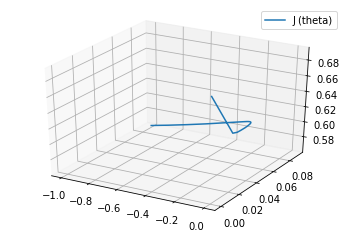

In [ ]:
plot_costs_theta(costs, theta0, theta1)

Prédire des valeurs de y

In [ ]:
# Predire pour des notes note1= 9 et note2=17


In [ ]:
def predict(X, theta, threshold = 0.5):
 
  predictions = sigmoid(np.matmul(X, theta))
  predictions [predictions >= threshold] = 1
  predictions [predictions < threshold]  = 0
  return predictions

In [ ]:
test =np.array([[1,9,17]])
predict(test, theta, 0.5)

array([[1.]])

In [ ]:
y_pred=predict(X,theta,0.5)

In [ ]:
def score(y1, y2):

 y1 = y1.reshape(y1.shape[0], 1)
 y2 = y2.reshape(y2.shape[0], 1)
 y1_not = (1 - y1).reshape(y1.shape[0], 1)
 y2_not = (1 - y2).reshape(y1.shape[0], 1)
 a = np.multiply(y1_not, y2_not) + np.multiply(y1, y2)   
 
 ones_ = np.count_nonzero(a == 1)  
 return (ones_ / y1.shape[0]) * 100

In [ ]:
score(y, y_pred)

92.0

# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X, y)
clf.coef_

array([[-5.46675308e-08,  9.45433340e-01,  9.10032400e-01]])

In [ ]:
theta

array([[-6.64988582],
       [ 0.30891246],
       [ 0.27336836]])

# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

In [ ]:
#Nous pouvons varier le nombre d'iterations pour voir 
def test_iterations(iterations, alpha):
  n=X.shape[1]
  theta = np.zeros((n, 1))
  theta, costs, theta0, theta1 = gradientDescent(X, y, theta, alpha, iterations);
  y_pred = predict(X, theta, 0.5)
  
  print(f'\nNombre iterations : {iterations}, alpha : {alpha}  accuracy : {score(y, y_pred)}')


In [ ]:
#Pour un nombre d'iterations = 2500, 3500, 4500, 5500
for i in range(2500, 15000, 1000):
  test_iterations(i, 0.01)


Nombre iterations : 2500, alpha : 0.01  accuracy : 66.0

Nombre iterations : 3500, alpha : 0.01  accuracy : 74.0

Nombre iterations : 4500, alpha : 0.01  accuracy : 80.0

Nombre iterations : 5500, alpha : 0.01  accuracy : 82.0

Nombre iterations : 6500, alpha : 0.01  accuracy : 83.0

Nombre iterations : 7500, alpha : 0.01  accuracy : 86.0

Nombre iterations : 8500, alpha : 0.01  accuracy : 89.0

Nombre iterations : 9500, alpha : 0.01  accuracy : 88.0

Nombre iterations : 10500, alpha : 0.01  accuracy : 90.0

Nombre iterations : 11500, alpha : 0.01  accuracy : 91.0

Nombre iterations : 12500, alpha : 0.01  accuracy : 93.0

Nombre iterations : 13500, alpha : 0.01  accuracy : 93.0

Nombre iterations : 14500, alpha : 0.01  accuracy : 93.0


In [ ]:
alphas = [0.0001, 0.01, 0,1]
for i in alphas:
  test_iterations(15000, i)


Nombre iterations : 15000, alpha : 0.0001  accuracy : 93.0

Nombre iterations : 15000, alpha : 0.01  accuracy : 93.0

Nombre iterations : 15000, alpha : 0  accuracy : 93.0

Nombre iterations : 15000, alpha : 1  accuracy : 93.0


Nous remarquons que l'accuracy augemente a chaque fois qu'on augemente le nombre d'iterations, contrairement a alpha, qui n'a aucune influence sur le resultat
**Conclusion** : pour 15000 itérations, nous avons une accuracy qui va jusqu'a 93%

Nous allons confirmer cela en redessinat la ligne de séparation

In [ ]:
# paramètres avec nombre d'iteration = 15000
iterations = 15000;
alpha = 0.01;
# Appel
theta, costs, theta0, theta1 = gradientDescent(X, y, theta, alpha, iterations);

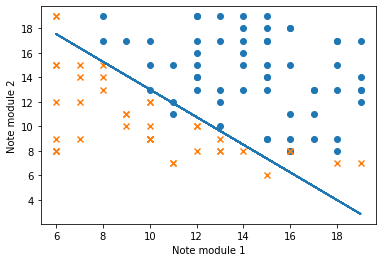

In [ ]:
drawLine(X,theta)

In [ ]:
plot_cost_iterations(theta0, theta1, costs)